In [1]:
import pandas as pd

df_trees = pd.read_csv("Trees.csv", low_memory=False)

conditions = ["Very Good", "Good", "Fair", "Poor", "Critical"]
df_trees_filtered = df_trees[df_trees["condition"].isin(conditions)]

tree_counts_long = (
    df_trees_filtered
    .groupby(["neighborhood", "condition"])
    .size()
    .reset_index(name="Tree_Count")
)

tree_counts_wide = (
    tree_counts_long
    .pivot(index="neighborhood", columns="condition", values="Tree_Count")
    .fillna(0)
    .astype(int)
)

tree_counts_wide["Total_Trees"] = (
    tree_counts_wide["Critical"]
    + tree_counts_wide["Fair"]
    + tree_counts_wide["Good"]
    + tree_counts_wide["Poor"]
    + tree_counts_wide["Very Good"]
)

top10 = (
    tree_counts_wide
    .sort_values("Total_Trees", ascending=False)
    .head(10)
)

print("Top 10 neighborhoods by total number of trees:")
for neighborhood, row in top10.iterrows():
    print(f"\nNeighborhood: {neighborhood}")
    print(f"  Total trees: {row['Total_Trees']}")
    for cond in conditions:
        print(f"  {cond}: {row[cond]}")

Top 10 neighborhoods by total number of trees:

Neighborhood: Squirrel Hill South
  Total trees: 4805
  Very Good: 76
  Good: 1978
  Fair: 1916
  Poor: 777
  Critical: 58

Neighborhood: Highland Park
  Total trees: 2680
  Very Good: 17
  Good: 1116
  Fair: 1083
  Poor: 440
  Critical: 24

Neighborhood: Squirrel Hill North
  Total trees: 1861
  Very Good: 19
  Good: 668
  Fair: 996
  Poor: 168
  Critical: 10

Neighborhood: South Side Flats
  Total trees: 1430
  Very Good: 15
  Good: 890
  Fair: 417
  Poor: 79
  Critical: 29

Neighborhood: Shadyside
  Total trees: 1279
  Very Good: 17
  Good: 311
  Fair: 720
  Poor: 197
  Critical: 34

Neighborhood: East Liberty
  Total trees: 1220
  Very Good: 36
  Good: 450
  Fair: 565
  Poor: 118
  Critical: 51

Neighborhood: Point Breeze
  Total trees: 1152
  Very Good: 17
  Good: 335
  Fair: 667
  Poor: 117
  Critical: 16

Neighborhood: Bloomfield
  Total trees: 1151
  Very Good: 32
  Good: 524
  Fair: 444
  Poor: 126
  Critical: 25

Neighborhood: C

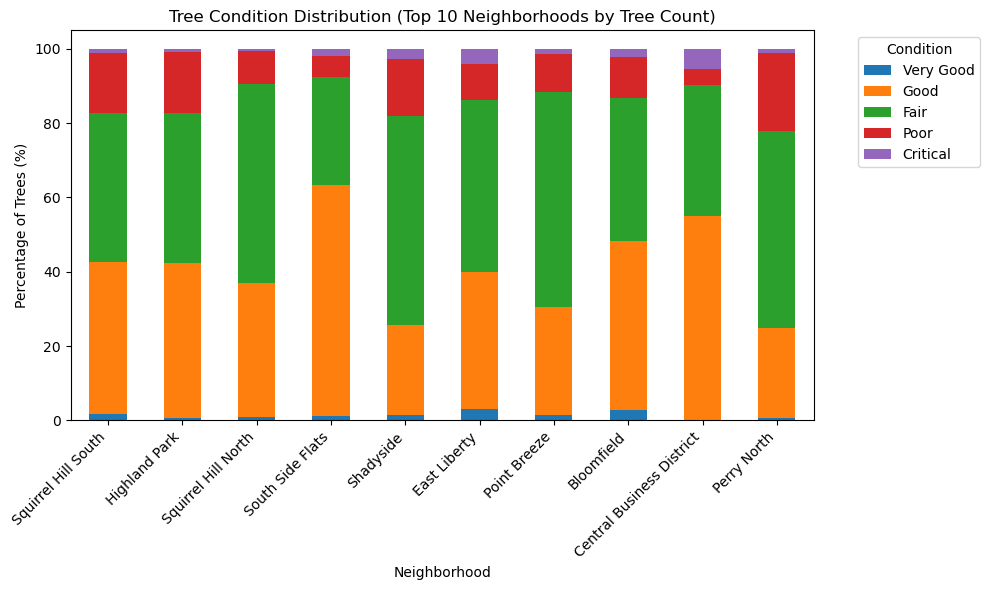

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_trees = pd.read_csv("Trees.csv", low_memory=False)

conditions = ["Very Good", "Good", "Fair", "Poor", "Critical"]
df_trees_filtered = df_trees[df_trees["condition"].isin(conditions)]

tree_counts_long = (
    df_trees_filtered
    .groupby(["neighborhood", "condition"])
    .size()
    .reset_index(name="Tree_Count")
)

tree_counts_wide = (
    tree_counts_long
    .pivot(index="neighborhood", columns="condition", values="Tree_Count")
    .fillna(0)
    .astype(int)
)

tree_counts_wide["Total_Trees"] = tree_counts_wide[conditions].sum(axis=1)

top10 = (
    tree_counts_wide
    .sort_values("Total_Trees", ascending=False)
    .head(10)
)

top10_percent = top10[conditions].div(top10["Total_Trees"], axis=0) * 100

ax = top10_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.xlabel("Neighborhood")
plt.ylabel("Percentage of Trees (%)")
plt.title("Tree Condition Distribution (Top 10 Neighborhoods by Tree Count)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()